# Looking at different distributions in the dataset (06-10-24)

The purpose of this file is to look at how our entries, logbooks, and spread of data changes with each new export and also how it changes upon infilling data.

Here we look at four main things:
1. The distribution of all our Beaufort-scale wind force terms on a scale of 0-12: We do this to see what number of terms occurs most and how we may want to improve our classification down the line.
2. Entries per logbook: We do this to see which logbooks have most of the data and which ones lack data.
3. We repeat the entries per logbook, but strictly only using logbooks from the Providence Public Library. We do this because this is where most of our current data comes from.
4. Entries per year: we need to see the spread of what years our data covers so we can see biases and where we may need to focus on collecting more data. Currently, most of the data covers 1840-1860, as this was the peak of the whaling industry in New Emgland.

Everything else in this script begins to focus analyses specifically in the North Atlantic Ocean and the Azores High region. This data is not necessary for each new update. This work was begun by previous researchers and does not have as much significance as these first few plots. There is a note in the script where the user can mostly ignore the rest. 

In [1]:
# Import
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime, os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
pd.options.display.max_columns = 50

print("Last updated on {}".format(datetime.datetime.now().ctime()))

Last updated on Tue Jun 18 16:02:42 2024


In [2]:
# Import Data
#df = pd.read_pickle("Tier1_logentries-export-2024-06-10.pkl")
#df = pd.read_pickle("Tier2_logentries-export-2024-06-10.pkl")
#df = pd.read_pickle("Tier3_logentries-export-2024-06-10.pkl")
#df = pd.read_pickle("Tier4_logentries-export-2024-06-10.pkl")
df = pd.read_pickle("Tier5_logentries-export-2024-06-10.pkl")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96383 entries, 0 to 98177
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DateTime                    96378 non-null  object        
 1   ID                          96380 non-null  float64       
 2   LogBook ID                  96379 non-null  object        
 3   Page                        59413 non-null  float64       
 4   Latitude                    72421 non-null  float64       
 5   Longitude                   62459 non-null  float64       
 6   Depth                       2134 non-null   float64       
 7   Depth Unit                  22937 non-null  object        
 8   Bottom                      63 non-null     object        
 9   Landmark                    15197 non-null  object        
 10  Ship Heading/Course         53219 non-null  object        
 11  Wind Direction              67518 non-null  object        


In [3]:
# Remove the first three rows with IDs 4.5, 10, and 55 from the dataset (if they're not already gone)
df = df[~df['LogBook ID'].isin([4.5, 10, 55])]


In [4]:
# Setting up a folder system 
# Create folders called "Figures" and "Text/CSV Files" manually

# Get current directory
current_directory = os.getcwd()

# Specify the path to the folder
Figures = os.path.join(current_directory, 'Figures')
Files = os.path.join(current_directory, 'Text Files')
CSV = os.path.join(current_directory, 'CSV Files')
Data = os.path.join(current_directory, 'Data Distributions')

### How many Entries (overall) are 'usable', i.e. exhibit Lat./Lon. and Wind Speed values?

In [5]:
df['usable'] = (df["Latitude"].notna() & df["Longitude"].notna() & df["Wind Force"].notna())
df_u = df[df['usable']==True]
df_u

,DateTime,ID,LogBook ID,Page,Latitude,Longitude,Depth,Depth Unit,Bottom,Landmark,Ship Heading/Course,Wind Direction,Wind Speed/Force,Wind Force,Sea State,Cloud Cover,Weather,Ship Sightings,Miscellaneous Observations,wind force,Entry Date Time,Direction,Wind Direction Before,coord_diff,usable,usable_latlon,usable_lat
0,1867-12-15 12:00:00,101378.0,Catalpa (bark) 1867-1871,48.0,-57.500000,-73.666667,NaN,NaN,NaN,NaN,W,225.0,strong gale,9.0,NaN,NaN,NaN,NaN,NaN,False,1867-12-15 12:00:00,nan,SSW,False,True,True,True
1,1867-12-14 12:00:00,101377.0,Catalpa (bark) 1867-1871,47.0,-58.500000,-69.666667,NaN,NaN,NaN,NaN,WSW,180.0,strong winds,6.0,NaN,NaN,NaN,NaN,NaN,False,1867-12-14 12:00:00,nan,S,False,True,True,True
2,1867-12-13 12:00:00,101376.0,Catalpa (bark) 1867-1871,47.0,-59.166667,-67.683333,NaN,NaN,NaN,NaN,SE,225.0,strong gale,9.0,NaN,NaN,NaN,NaN,NaN,False,1867-12-13 12:00:00,nan,SW,False,True,True,True
3,1867-12-12 12:00:00,101375.0,Catalpa (bark) 1867-1871,47.0,-58.133333,-68.500000,NaN,NaN,NaN,NaN,NaN,225.0,strong winds,6.0,NaN,NaN,rain squalls,NaN,NaN,False,1867-12-12 12:00:00,nan,SSW to WSW,False,True,True,True
4,1867-12-11 12:00:00,101374.0,Catalpa (bark) 1867-1871,47.0,-57.833333,-67.533333,NaN,NaN,NaN,NaN,NaN,270.0,light winds,2.0,NaN,NaN,squalls,NaN,NaN,False,1867-12-11 12:00:00,nan,W,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98173,1855-11-06 12:00:00,520.0,Alpha (ship) 1855-1859,26.0,-40.116667,39.033333,NaN,Fathoms,NaN,NaN,SE by E,337.5,moderate gale,8.0,NaN,NaN,squally,NaN,"""Under fore and main topsail and foresail, miz...",False,1855-11-06 12:00:00,nan,N NW,False,True,True,True
98174,1855-11-05 12:00:00,519.0,Alpha (ship) 1855-1859,26.0,-39.983333,28.150000,NaN,Fathoms,NaN,NaN,"""Middle moderate""",337.5,strong breeze and squally winds,6.0,NaN,NaN,NaN,NaN,"""Took in Fore and Main topgallant sails""",False,1855-11-05 12:00:00,nan,N NW,True,True,True,True
98175,1855-11-04 12:00:00,518.0,Alpha (ship) 1855-1859,26.0,-40.383333,23.616667,NaN,Fathoms,NaN,NaN,SE by E,337.5,strong breezes,6.0,NaN,NaN,NaN,NaN,"""Under double-reefed topsails""",False,1855-11-04 12:00:00,nan,N NW,False,True,True,True
98176,1855-11-03 12:00:00,517.0,Alpha (ship) 1855-1859,26.0,-40.083333,19.716667,NaN,Fathoms,NaN,NaN,SE by S,225.0,strong breezes,6.0,NaN,NaN,NaN,NaN,"""Furled the mainsail and jib""",False,1855-11-03 12:00:00,nan,W by S,False,True,True,True


### Histogram of Beaufort Scale values

Number of entries covered by the mapping so far:  55358


Text(0.5, 1.0, 'Tier 5 Usable Distribution of Wind Speed Values on Beaufort Scale - 55358 Entries')

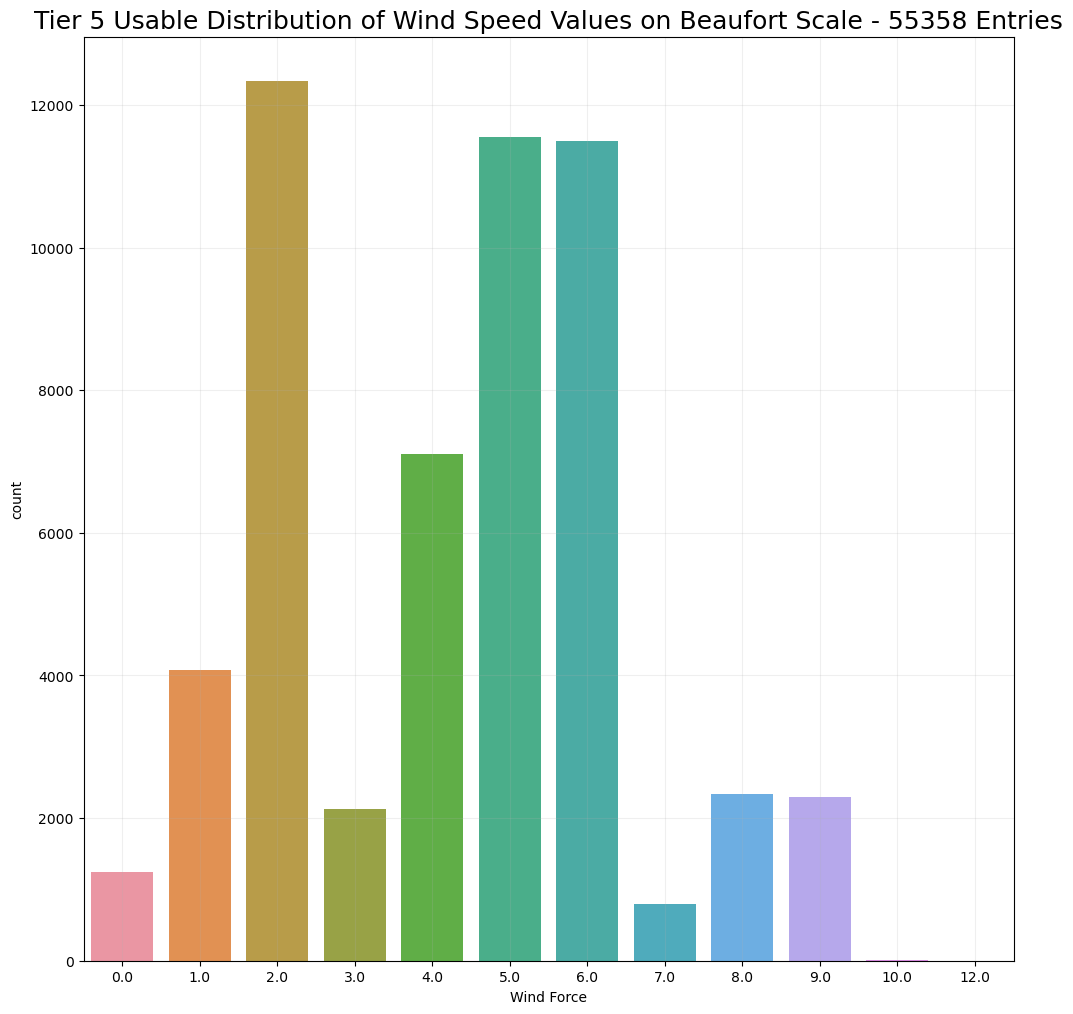

In [6]:
# Print the number of entries plotted
num_entries = np.size(df_u['Wind Force'])
print('Number of entries covered by the mapping so far: ',num_entries)

# Plot the data 
f, ax = plt.subplots(figsize = (12,12)) # adds figure
sns.countplot(x=df_u["Wind Force"]) # plots the data along the x-axis 
ax.grid(alpha=0.2) # adds grid to background

# Change title and figure name for each tier
plt.title(f'Tier 5 Usable Distribution of Wind Speed Values on Beaufort Scale - {num_entries} Entries',fontsize=18)
plt.savefig(os.path.join(Data, 'Tier5_Distribution_Beaufort Scale_Jun10_24.png'),dpi=300,bbox_inches='tight')

### Entries per Logbook

Unique Log Books:  170


Text(0.5, 1.0, 'Not including duplicate logbooks: Leonidas (ship) Journal 1830-1833 & Margaret (ship) 1835-1836')

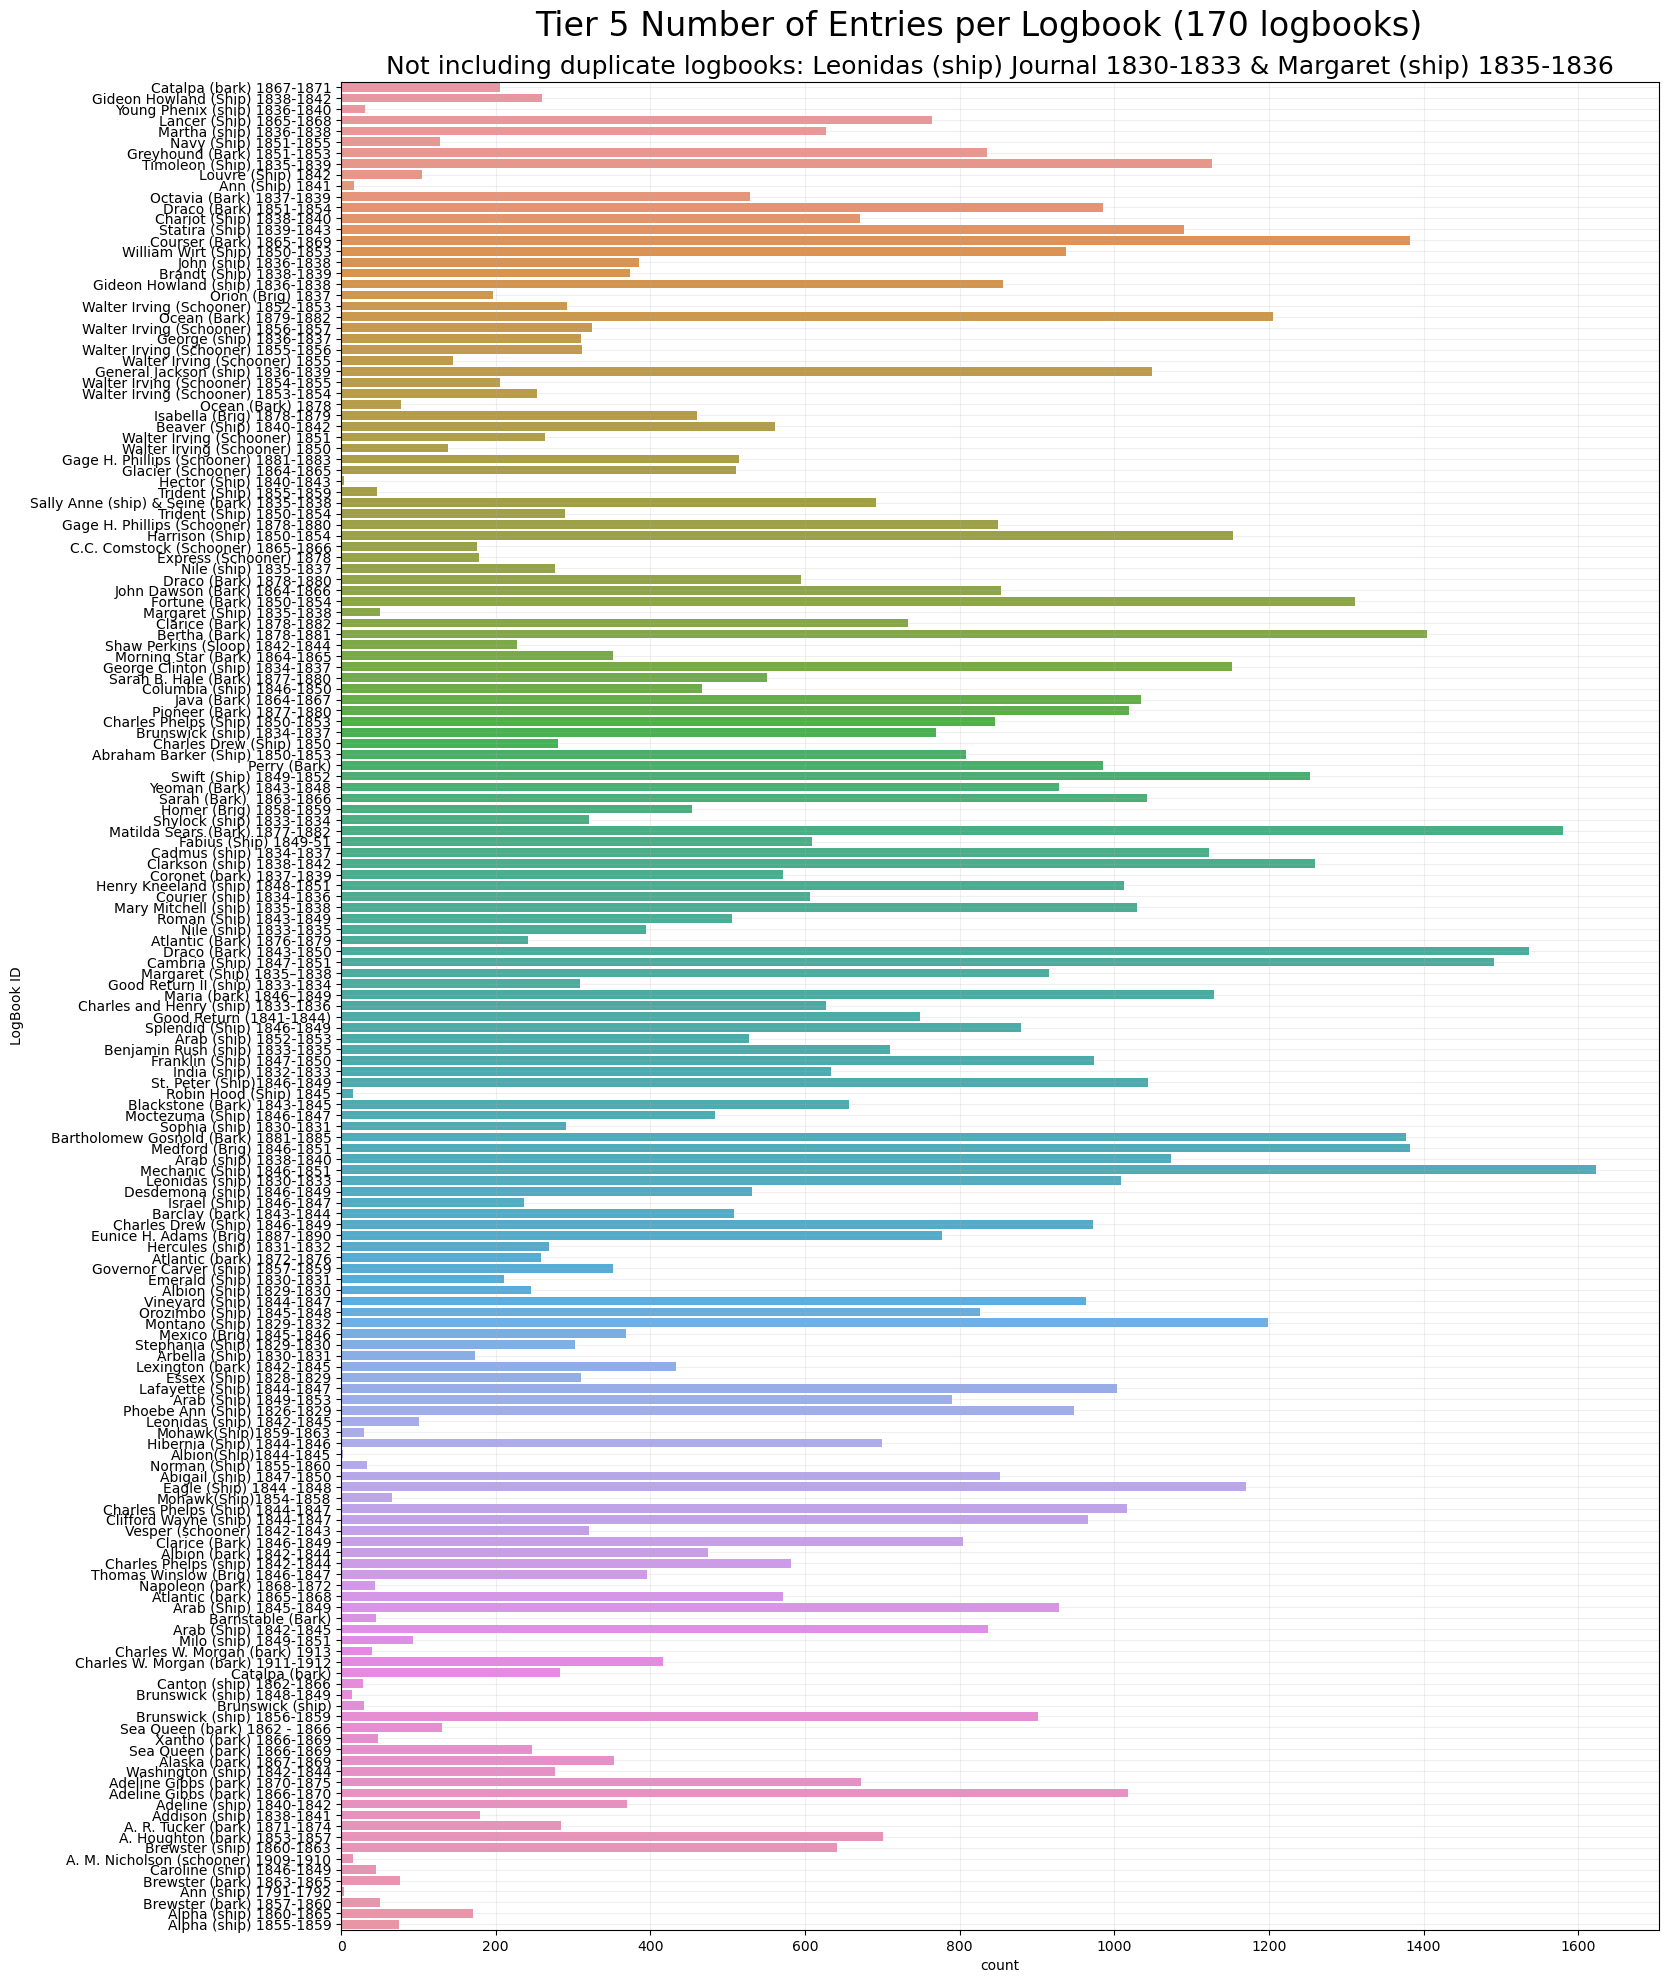

In [7]:
# Prints the number of unique logbooks 
num_entries = np.size(df["LogBook ID"].unique()) 
print('Unique Log Books: ',num_entries)

# Plotting the count of unique logbooks data 
f,ax = plt.subplots(figsize=(17,24)) # adds figure
sns.countplot(y=df["LogBook ID"]) # plots the data
ax.grid(alpha=0.2) # adds light grid to background

# Change title and fig name for each tier and change date for new exports
plt.suptitle(f'Tier 5 Number of Entries per Logbook ({num_entries} logbooks)', fontsize=24, y = 0.91)
plt.title('Not including duplicate logbooks: Leonidas (ship) Journal 1830-1833 & Margaret (ship) 1835-1836',fontsize=18)
plt.savefig(os.path.join(Data,'Tier5_No. of Entries per Logbook_Jun10_24.png'),dpi=300,bbox_inches='tight')


Providence Public Library Logbooks

In [8]:
# With each update, add new PPL logbooks to this list

#df["LogBook ID"].sort_values().unique()
ppl_logbook_ids = [
    "Navy (Ship) 1851-1855", 
    "Young Phenix (ship) 1836-1840",
    "Gideon Howland (Ship) 1838-1842",
    "Louvre (Ship) 1842",
    "Martha (ship) 1836-1838",
    "Ann (Ship) 1841",
    "Greyhound (Bark) 1851-1853",
    "Octavia (Bark) 1837-1839",
    "Timoleon (Ship) 1835-1839",
    "Lancer (Ship) 1865-1868",
    "Draco (Bark) 1851-1854",
    "John (ship) 1836-1838",
    "Chariot (Ship) 1838-1840",
    "Brandt (Ship) 1838-1839",
    "William (Brig) 1838",
    "Orion (Brig) 1837",
    "William Wirt (Ship) 1850-1853",
    "Gideon Howland (ship) 1836-1838",
    "Walter Irving (Schooner) 1856-1857",
    "Walter Irving (Schooner) 1855-1856",
    "George (ship) 1836-1837",
    "Walter Irving (Schooner) 1855",
    "Walter Irving (Schooner) 1854-1855",
    "Walter Irving (Schooner) 1853-1854",
    "Ocean (Bark) 1879-1882",
    "Ocean (Bark) 1878",
    "Walter Irving (Schooner) 1852-1853",
    "Walter Irving (Schooner) 1851",
    "Isabella (Brig) 1878-1879",
    "Courser (Bark) 1865-1869",
    "General Jackson (ship) 1836-1839",
    "Walter Irving (Schooner) 1850",
    "Beaver (Ship) 1840-1842",
    "Hector (Ship) 1840-1843",
    "Statira (Ship) 1839-1843",
    "Trident (Ship) 1855-1859",
    "Gage H. Phillips (Schooner) 1881-1883",
    "Trident (Ship) 1850-1854",
    "Glacier (Schooner) 1864-1865",
    "Gage H. Phillips (Schooner) 1878-1880",
    "Sally Anne (ship) & Seine (bark) 1835-1838",
    "Express (Schooner) 1878",
    "C.C. Comstock (Schooner) 1865-1866",
    "Nile (ship) 1835-1837",
    "Draco (Bark) 1878-1880",
    "Harrison (Ship) 1850-1854",
    "Clarice (Bark) 1878-1882",
    "Margaret (ship) 1835-1838",
    "Shaw Perkins (Sloop) 1842-1844",
    "John Dawson (Bark) 1864-1866",
    "Bertha (Bark) 1878-1881",
    "Morning Star (Bark) 1864-1865",
    "Sarah B. Hale (Bark) 1877-1880",
    "Fortune (Bark) 1850-1854",
    "George Clinton (ship) 1834-1837",
    "Charles Phelps (Ship) 1850-1853",
    "Charles Drew (Ship) 1850",
    "Pioneer (Bark) 1877-1880",
    "Pioneer (Bark) 1877-1880",
    "Abraham Barker (Ship) 1850-1853",
    "Java (Bark) 1864-1867",
    "Brunswick (ship) 1834-1837",
    "Perry (Bark)",
    "Shylock (ship) 1833-1834",
    "Swift (Ship) 1849-1852",
    "Sarah (Bark) 1863-1866",
    "Fabius (Ship) 1849-51",
    "Matilda Sears (Bark) 1877-1882",
    "Cadmus (ship) 1834-1837",
    "Yeoman (Bark) 1843-1848",
    "Courier (ship) 1834-1836",
    "Roman (Ship) 1843-1849",
    "Nile (ship) 1833-1835",
    "Good Return II (ship) 1833-1834",
    "Cambria (Ship) 1847-1851",
    "Charles and Henry (ship) 1833-1836",
    "Benjamin Rush (ship) 1833-1835",
    "Splendid (Ship) 1846-1849",
    "India (ship) 1832-1833",
    "Draco (Bark) 1843-1850",
    "Robin Hood (Ship) 1845",
    "St. Peter (Ship)1846-1849",
    "Moctezuma (Ship) 1846-1847",
    "Sophia (ship) 1830-1831",
    "Medford (Brig) 1846-1851",
    "Leonidas (ship) Journal 1830-1833",
    "Mechanic (Ship) 1846-1851",
    "Blackstone (Bark) 1843-1845",
    "Israel (Ship) 1846-1847",
    "Leonidas (ship) 1830-1833",
    "Eunice H. Adams (Brig) 1887-1890",
    "Hercules (ship) 1831-1832",
    "Emerald (Ship) 1830-1831",
    "Charles Drew (Ship) 1846-1849",
    "Albion (Ship) 1829-1830",
    "Orozimbo (Ship) 1845-1848",
    "Mexico (Brig) 1845-1846",
    "Montano (Ship) 1829-1832",
    "Barclay (bark) 1843-1844",
    "Stephania (Ship) 1829-1830",
    "Arbella (Ship) 1830-1831",
    "Vineyard (Ship) 1844-1847",
    "Essex (Ship) 1828-1829",
    "Lafayette (Ship) 1844-1847",
    "Leonidas (ship) 1842-1845",
    "Phoebe Ann (Ship) 1826-1829",
    "Lexington (bark) 1842-1845",
    "Abigail (ship) 1847-1850",
    "Vesper (schooner) 1842-1843",
    "Clarice (Bark) 1846-1849",
    "Thomas Winslow (Brig) 1846-1847",
    "Charles Phelps (ship) 1842-1844",
    "Charles Phelps (Ship) 1844-1847",
    "Hibernia (Ship) 1844-1846"
]

# new dataframe to subset to PPL LogBook IDs
df_PPL = df[df["LogBook ID"].isin(ppl_logbook_ids)]

Unique Log Books from PPL:  109


Text(0.5, 1.0, 'Tier 5 Number of Entries per Logbook (109 logbooks - no duplicates)')

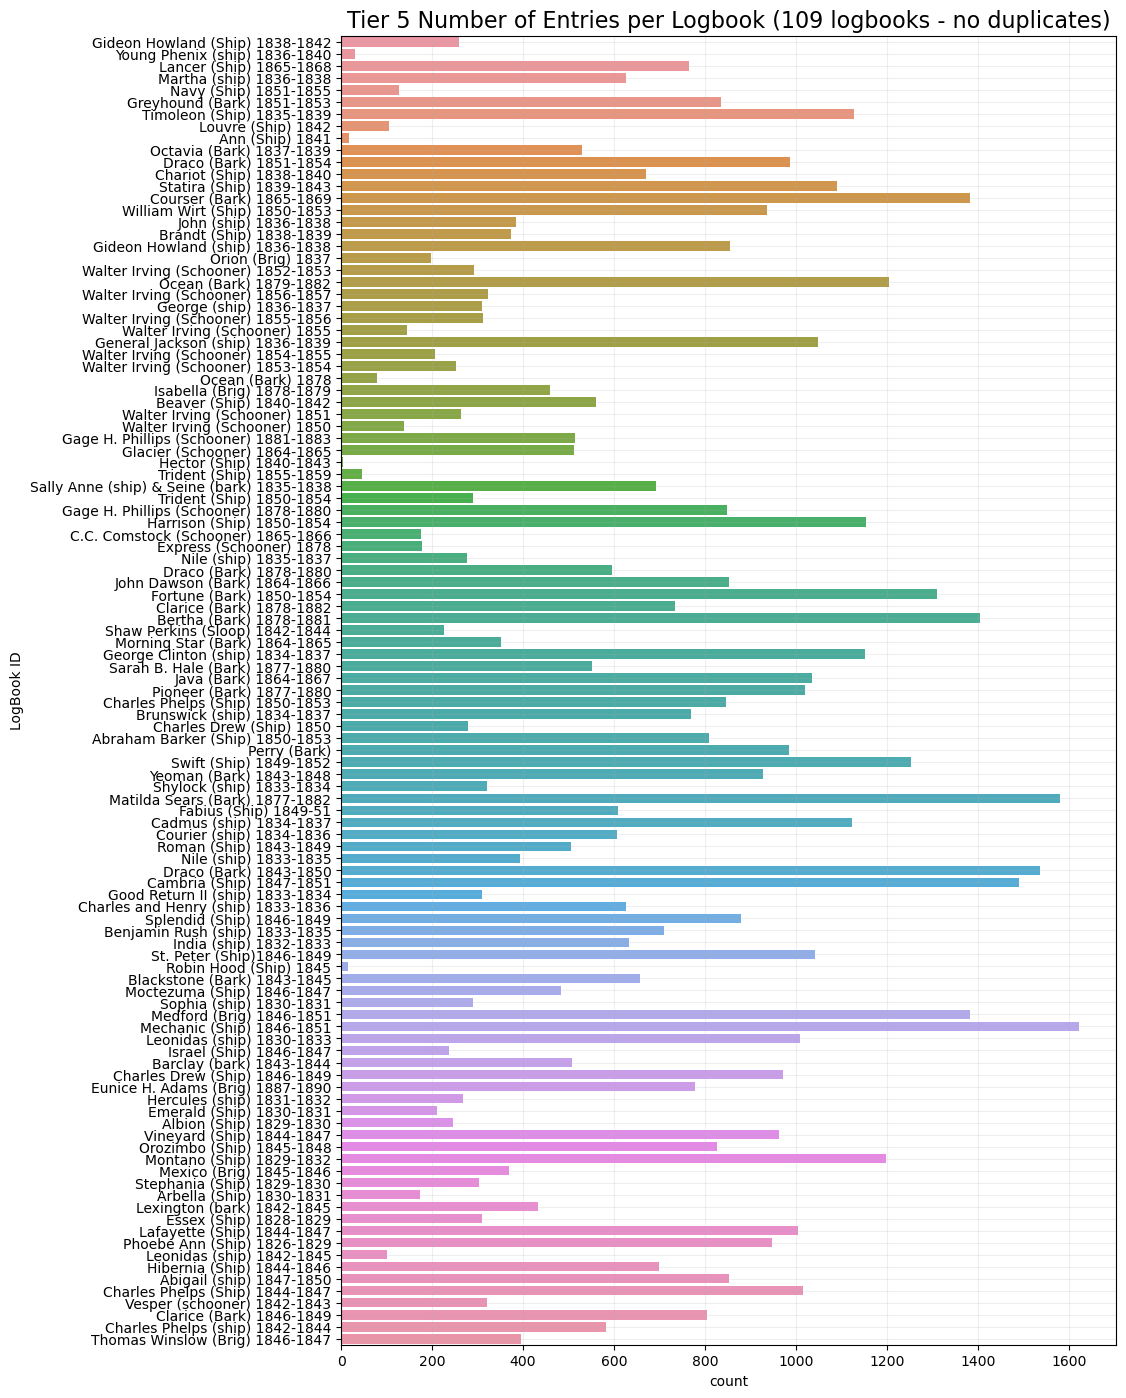

In [9]:
# Plotting the number of entries per logbook with only PPL logbooks
num_entries = np.size(df_PPL["LogBook ID"].unique())
print('Unique Log Books from PPL: ',num_entries)

# Plotting the unique PPL logbook data
f,ax = plt.subplots(figsize=(10,17)) # adds figure
sns.countplot(y=df_PPL["LogBook ID"]) # plots the data
ax.grid(alpha=0.2) # adds light grid to background

# Change title and fig name for each tier and change date for new exports
# no duplicates is there bc we removed one Leonidas logbook due to duplicates of the dataset
plt.title(f'Tier 5 Number of Entries per Logbook ({num_entries} logbooks - no duplicates)',fontsize=16)
plt.savefig(os.path.join(Data,'Tier5_No. of Entries per Logbook_PPL_Jun10_24.png'),dpi=300,bbox_inches='tight')


### Entries per Year

Number of years:  71
[1867. 1839. 1837. 1836. 1838. 1852. 1851.   nan 1853. 1866. 1842. 1854.
 1865. 1840. 1869. 1835. 1841. 1868. 1882. 1850. 1857. 1856. 1881. 1880.
 1855. 1879. 1878. 1883. 1859. 1858. 1864. 1844. 1848. 1847. 1877. 1834.
 1846. 1833. 1849. 1845. 1863. 1843. 1832. 1831. 1885. 1830. 1876. 1890.
 1889. 1888. 1887. 1874. 1829. 1828. 1873. 1827. 1826. 1872. 1860. 1913.
 1912. 1911. 1884. 1875. 1862. 1861. 1871. 1870. 1910. 1909. 1792.]

Empty DataFrame
Columns: [DateTime, ID, LogBook ID, Page, Latitude, Longitude, Depth, Depth Unit, Bottom, Landmark, Ship Heading/Course, Wind Direction, Wind Speed/Force, Wind Force, Sea State, Cloud Cover, Weather, Ship Sightings, Miscellaneous Observations, wind force, Entry Date Time, Direction, Wind Direction Before, coord_diff, usable, usable_latlon, usable_lat]
Index: []


Text(0.5, 1.0, 'Tier 5 Number of Entries per Year (71 years)')

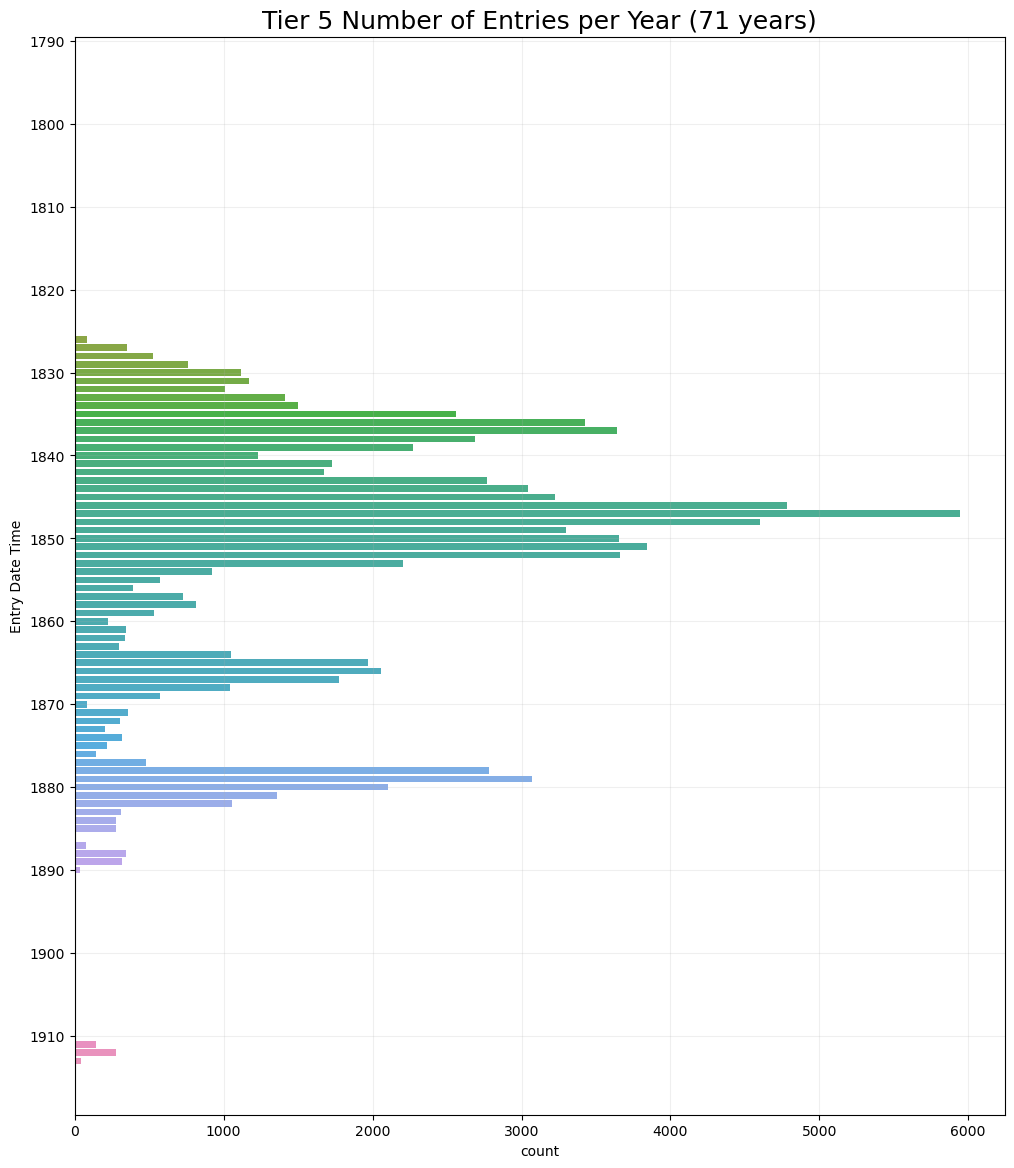

In [10]:
# Plotting the number of entries by year

# Printing the years that have data from our entries
num_years = np.size(df["Entry Date Time"].dt.year.unique())
print('Number of years: ',num_years)
print(df["Entry Date Time"].dt.year.unique())
print()
print(df.loc[df["Entry Date Time"].dt.year==2021.])

# Generate a list of years from 1792 to 1913
all_years = np.arange(1790, 1920)

# Plot the count of entries per year
f, ax = plt.subplots(figsize=(12, 14)) # adds figure 
sns.countplot(y=df["Entry Date Time"].dt.year, order=all_years, ax=ax) # plotting the data from the given years
ax.grid(alpha=0.2) # adds light grid to background

# Set y-tick labels to display only every 10 years
tick_spacing = 10
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

# Add title and save figure - change names for each tier
plt.title(f'Tier 5 Number of Entries per Year ({num_years} years)', fontsize=18)
plt.savefig(os.path.join(Data, 'Tier5_No. of Entries per Year_Jun10_24.png'), dpi=300, bbox_inches='tight')


Number of years:  71
[1867. 1839. 1837. 1836. 1838. 1852. 1851.   nan 1853. 1866. 1842. 1854.
 1865. 1840. 1869. 1835. 1841. 1868. 1882. 1850. 1857. 1856. 1881. 1880.
 1855. 1879. 1878. 1883. 1859. 1858. 1864. 1844. 1848. 1847. 1877. 1834.
 1846. 1833. 1849. 1845. 1863. 1843. 1832. 1831. 1885. 1830. 1876. 1890.
 1889. 1888. 1887. 1874. 1829. 1828. 1873. 1827. 1826. 1872. 1860. 1913.
 1912. 1911. 1884. 1875. 1862. 1861. 1871. 1870. 1910. 1909. 1792.]

Empty DataFrame
Columns: [DateTime, ID, LogBook ID, Page, Latitude, Longitude, Depth, Depth Unit, Bottom, Landmark, Ship Heading/Course, Wind Direction, Wind Speed/Force, Wind Force, Sea State, Cloud Cover, Weather, Ship Sightings, Miscellaneous Observations, wind force, Entry Date Time, Direction, Wind Direction Before, coord_diff, usable, usable_latlon, usable_lat]
Index: []


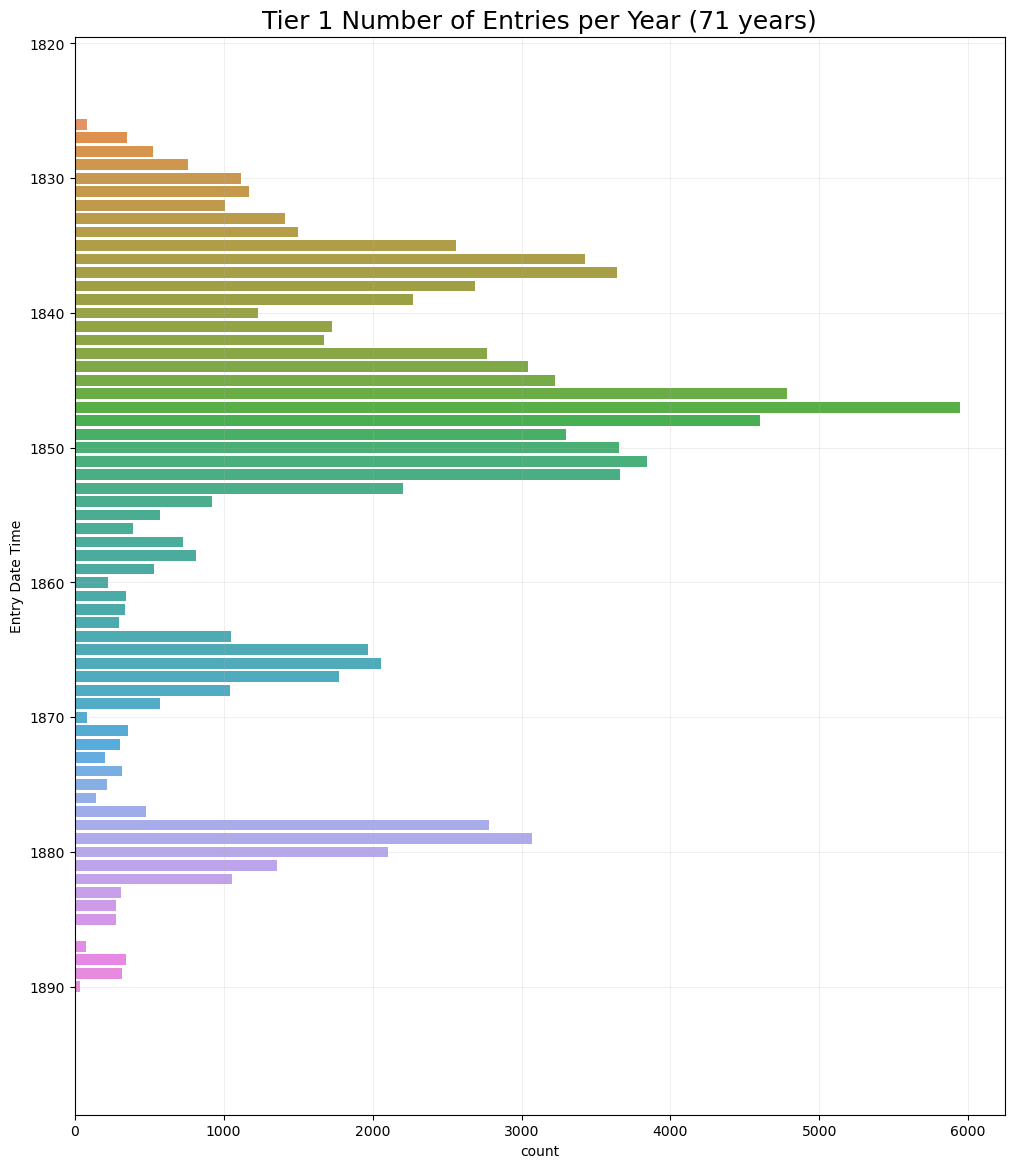

In [11]:
# Same figure as above but only includes the years 1820-1900 rather than 1790-1920

# Printing years from our dataset that contain entries
num_years = np.size(df["Entry Date Time"].dt.year.unique())
print('Number of years: ',num_years)
print(df["Entry Date Time"].dt.year.unique())
print()
print(df.loc[df["Entry Date Time"].dt.year==2021.])

# Generate a list of years from 1820 to 1900
all_years = np.arange(1820, 1900)

# Plot the count of entries per year
f, ax = plt.subplots(figsize=(12, 14)) # adds figure
sns.countplot(y=df["Entry Date Time"].dt.year, order=all_years, ax=ax) # adds data from 1820-1900
ax.grid(alpha=0.2) # adds light grid to background

# Set y-tick labels to display only every 10 years
tick_spacing = 10
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

# Adding a title and saving the figure - change names for each tier
plt.title(f'Tier 5 Number of Entries per Year ({num_years} years)', fontsize=18)
plt.savefig(os.path.join(Data, 'Zoomed_Tier5_No. of Entries per Year_Jun10_24.png'), dpi=300, bbox_inches='tight')

## All data anaylsis below this plot is not necessary for standard data distribution figures 

# Geographic Focus on Azores/North Atlantic (NA)

In [12]:
# Filtering out all values in the North Atlantic. Coordinate Range is based on: https://marineregions.org/gazetteer.php?p=details&id=1912
df_NA = df_u[(df_u["Latitude"]>-0.936) & (df_u["Longitude"].between(-79.0,12.0059,inclusive="both"))]
#print(df_NA)

### Plotting Geographically Focussed Data in the North Atlantic (NA)

1826 :  (74, 27)
1828 :  (5, 27)
1829 :  (175, 27)
1830 :  (167, 27)
1831 :  (80, 27)
1832 :  (58, 27)
1833 :  (171, 27)
1834 :  (106, 27)
1835 :  (227, 27)
1836 :  (275, 27)
1837 :  (422, 27)
1838 :  (266, 27)
1839 :  (195, 27)
1840 :  (92, 27)
1841 :  (63, 27)
1842 :  (155, 27)
1843 :  (274, 27)
1844 :  (384, 27)
1845 :  (273, 27)
1846 :  (659, 27)
1847 :  (423, 27)
1848 :  (208, 27)
1849 :  (471, 27)
1850 :  (520, 27)
1851 :  (547, 27)
1852 :  (324, 27)
1853 :  (515, 27)
1854 :  (267, 27)
1855 :  (212, 27)
1856 :  (146, 27)
1857 :  (112, 27)
1858 :  (49, 27)
1859 :  (66, 27)
1860 :  (92, 27)
1862 :  (23, 27)
1863 :  (97, 27)
1864 :  (312, 27)
1865 :  (313, 27)
1866 :  (286, 27)
1867 :  (67, 27)
1868 :  (26, 27)
1869 :  (32, 27)
1870 :  (20, 27)
1871 :  (7, 27)
1872 :  (60, 27)
1874 :  (12, 27)
1875 :  (135, 27)
1876 :  (63, 27)
1877 :  (155, 27)
1878 :  (660, 27)
1879 :  (506, 27)
1880 :  (219, 27)
1881 :  (220, 27)
1882 :  (217, 27)
1883 :  (24, 27)
1885 :  (37, 27)
1887 :  (45, 27

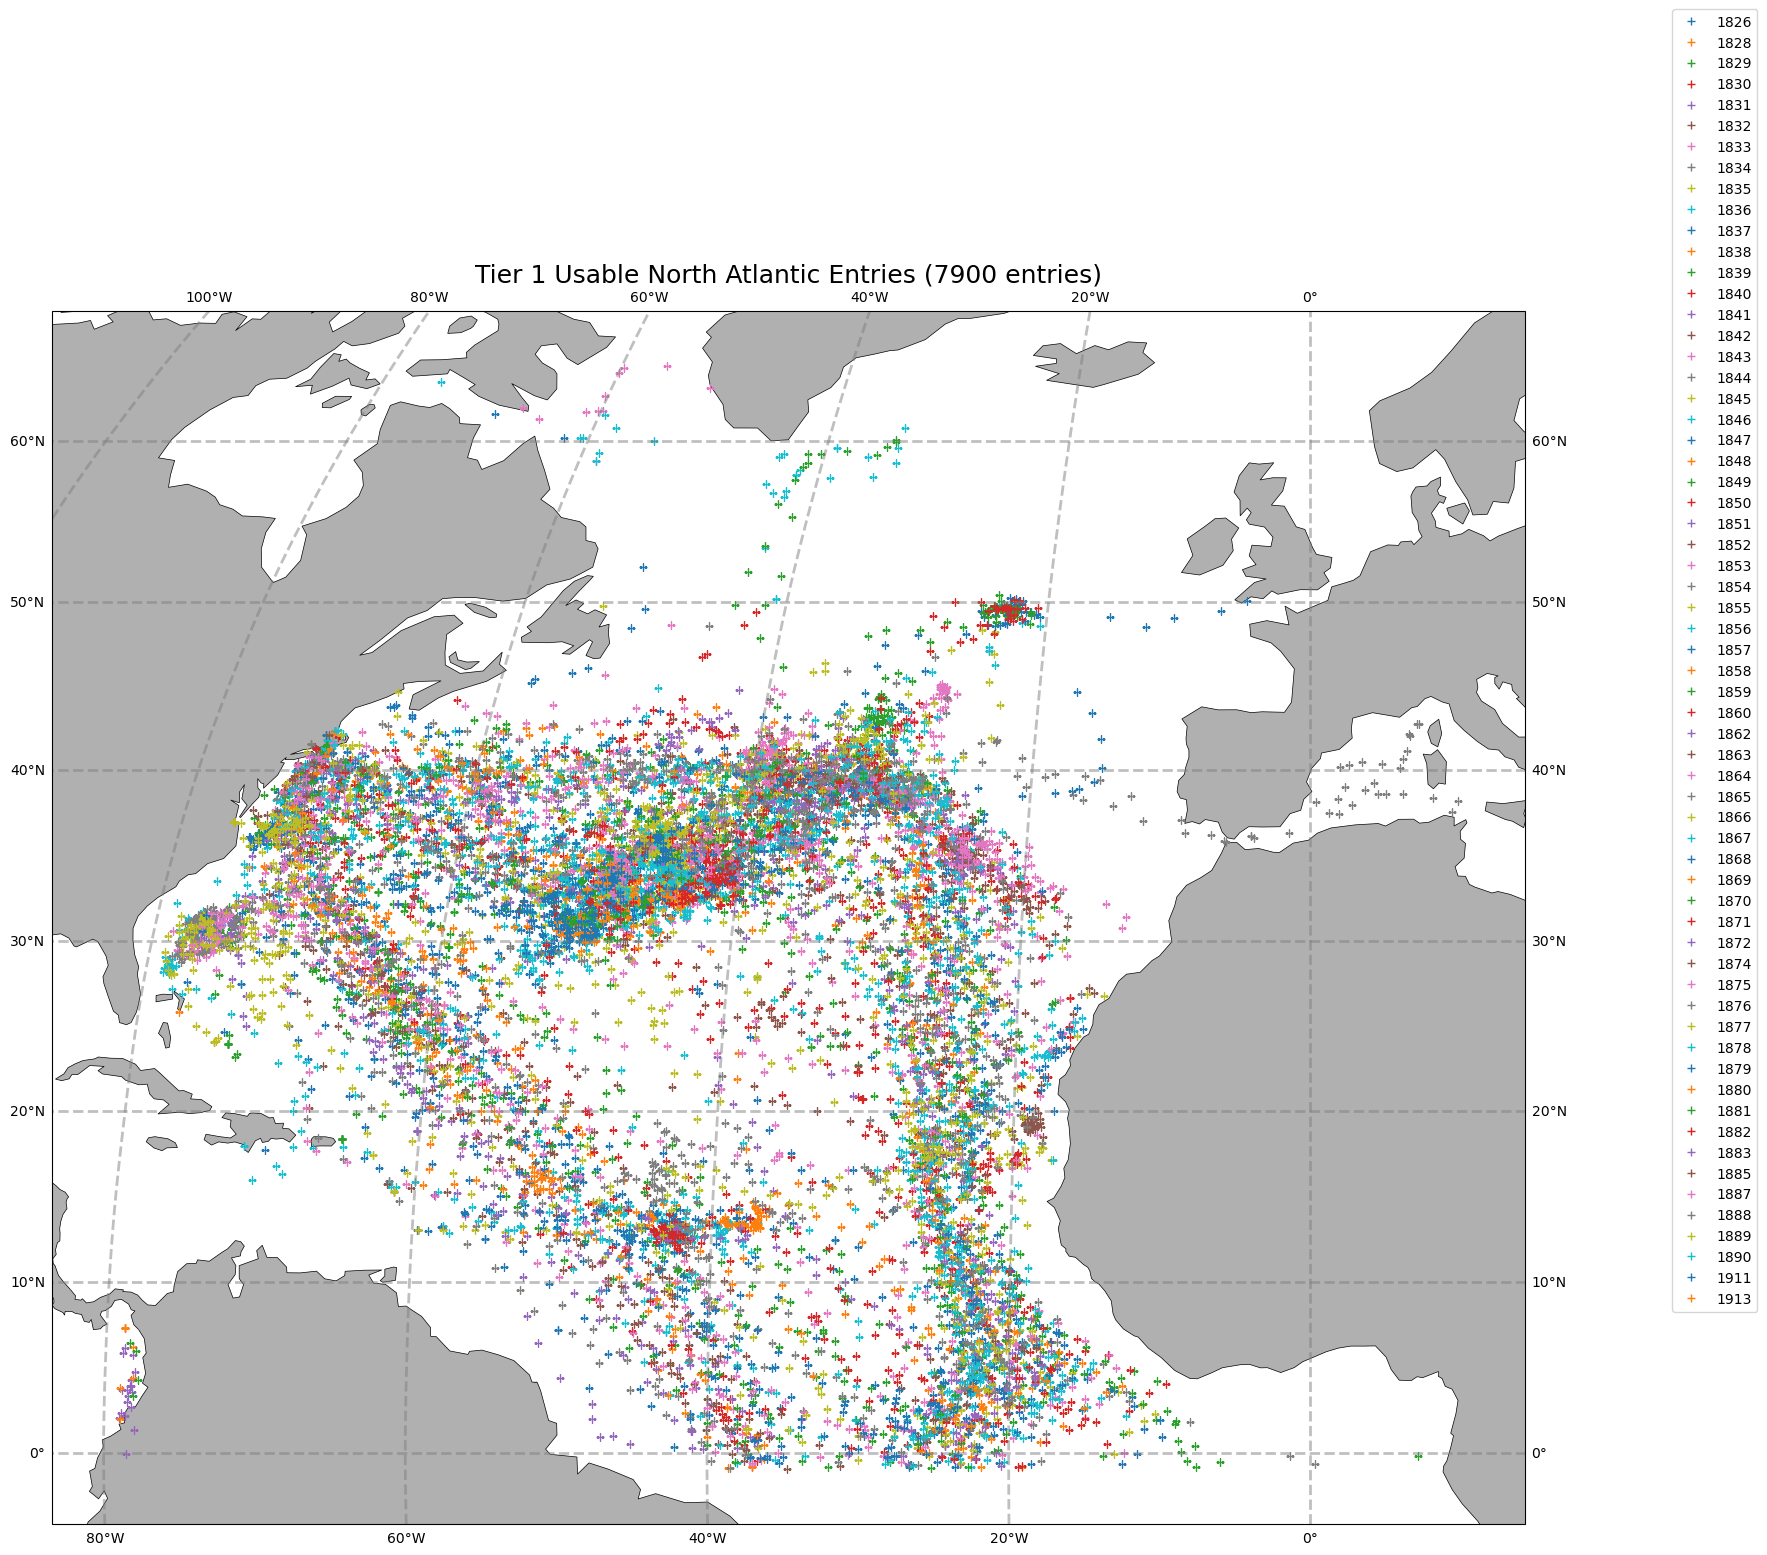

In [13]:
fig, ax = plt.subplots(figsize=(19,20),subplot_kw={'projection':ccrs.Robinson()})
#_ = ax.set_global()
_ = ax.coastlines(linewidth=0.5)
_ = ax.add_feature(cfeature.LAND, facecolor='#b0b0b0')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

# Initialize counter for the number of plotted values
num_plotted_values = 0

for yr in sorted(df_NA['Entry Date Time'].dt.year.unique()):
    work = df_NA[df_NA['Entry Date Time'].dt.year == yr]
    _ = ax.plot(work.Longitude, work.Latitude, '+', transform=ccrs.PlateCarree(), label='{:.0f}'.format(yr))
    num_plotted_values += len(work)
    print(yr,': ',np.shape(work))

_ = ax.legend(loc=(1.1,0.175))


# Change for each tier
plt.title('Tier 1 Usable North Atlantic Entries (7900 entries)',fontsize=18)
#fig.savefig(os.path.join(Data, 'Tier1_NA_Unique Years_Jun10_24.png'),dpi=300,bbox_inches='tight')

# Print the total number of plotted values
print("Total number of plotted values:", num_plotted_values)


Number of years:  62
[1837 1836 1838 1867 1851 1853 1852 1839 1842 1854 1865 1840 1869 1835
 1882 1850 1857 1856 1881 1855 1880 1879 1878 1883 1864 1866 1844 1877
 1834 1846 1859 1833 1858 1849 1845 1863 1848 1843 1847 1841 1831 1885
 1830 1876 1890 1889 1888 1887 1832 1829 1828 1826 1872 1868 1913 1911
 1875 1862 1870 1874 1871 1860]

Empty DataFrame
Columns: [DateTime, ID, LogBook ID, Page, Latitude, Longitude, Depth, Depth Unit, Bottom, Landmark, Ship Heading/Course, Wind Direction, Wind Speed/Force, Wind Force, Sea State, Cloud Cover, Weather, Ship Sightings, Miscellaneous Observations, wind force, Entry Date Time, Direction, Wind Direction Before, coord_diff, usable, usable_latlon, usable_lat]
Index: []


Text(0.5, 1.0, 'Tier 1 Number of Entries per Year (NA), 62 years')

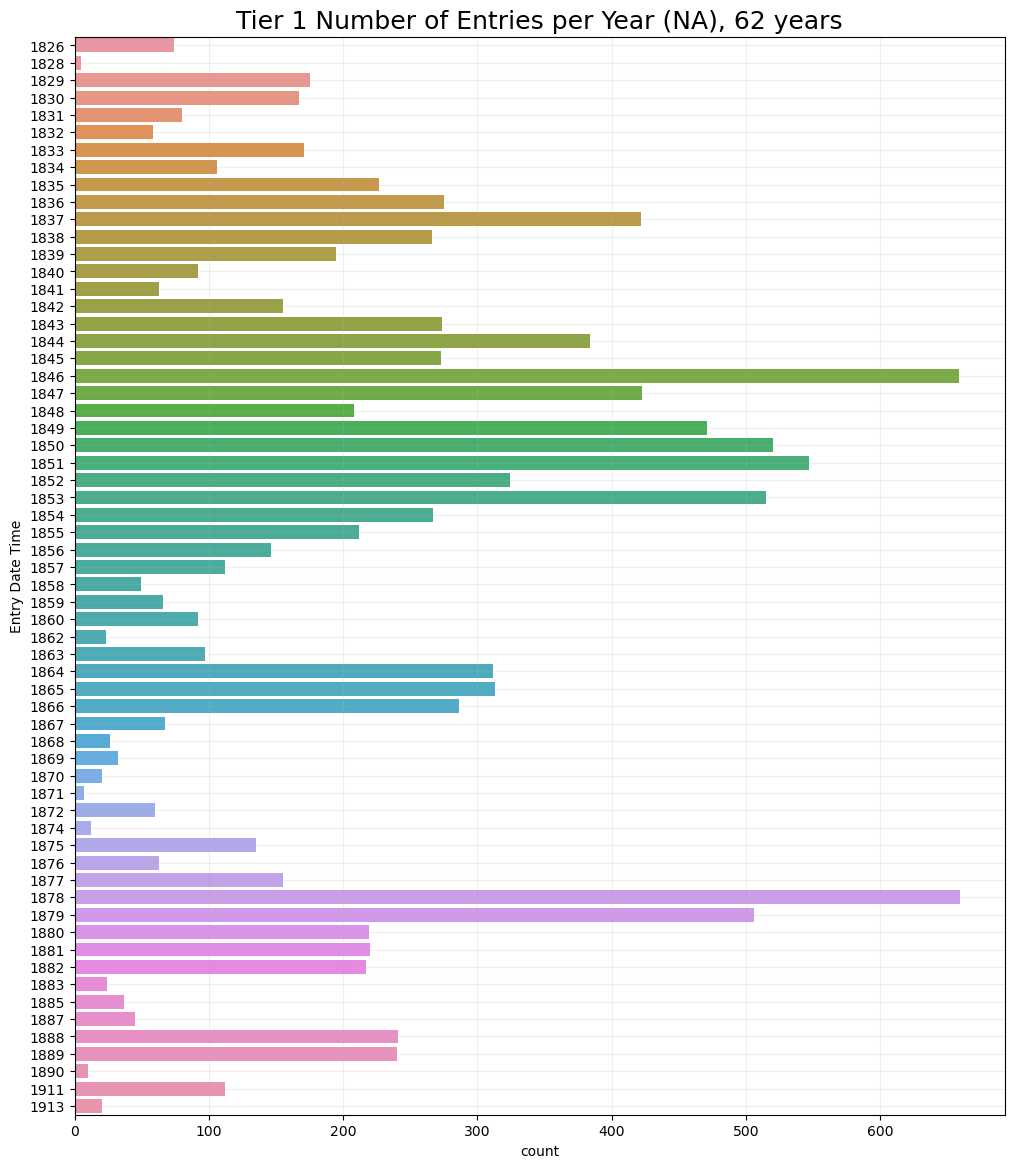

In [14]:
# Number of Entries per Year after Filtering NA values
print('Number of years: ',np.size(df_NA["Entry Date Time"].dt.year.unique()))
print(df_NA["Entry Date Time"].dt.year.unique())
print()
print(df_NA.loc[df_NA["Entry Date Time"].dt.year==2021.])

f,ax = plt.subplots(figsize=(12,14))
sns.countplot(y=df_NA["Entry Date Time"].dt.year)
ax.grid(alpha=0.2)

# Change for each tier
plt.title('Tier 1 Number of Entries per Year (NA), 62 years',fontsize=18)
#plt.savefig(os.path.join(Data, 'Tier1_No. of Entries per Year_NA.png'),dpi=200,bbox_inches='tight')


Unique Log Books:  155


Text(0.5, 1.0, 'Tier 1 Number of Entries per Logbook (NA), 150')

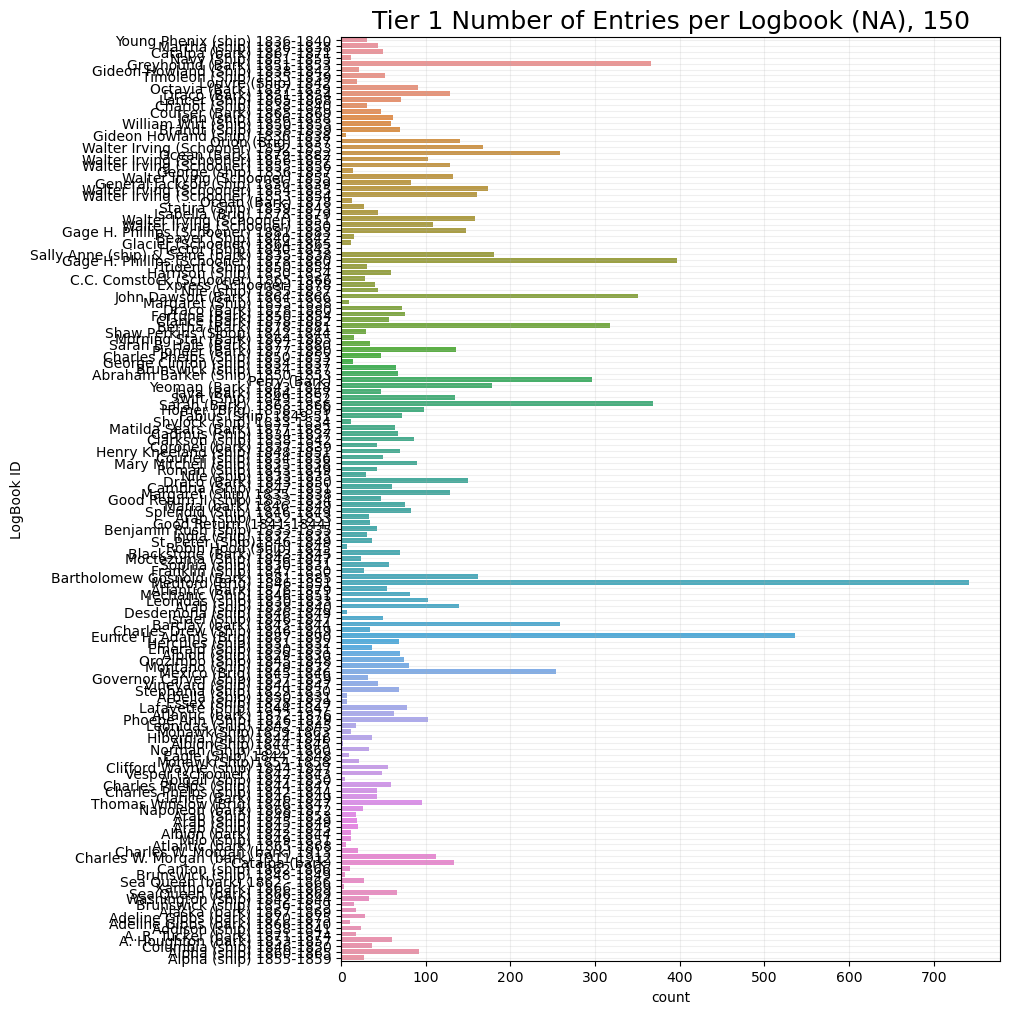

In [15]:
# Number of Entries per Logbook (NA)
print('Unique Log Books: ',np.size(df_NA["LogBook ID"].unique()))

f,ax = plt.subplots(figsize=(8.5,12))
sns.countplot(y=df_NA["LogBook ID"])
ax.grid(alpha=0.2)

# Change for each tier
plt.title('Tier 1 Number of Entries per Logbook (NA), 150',fontsize=18)
#plt.savefig(os.path.join(Data, 'Tier1_No. of Entries per Logbook_NA.png'),dpi=200,bbox_inches='tight')


### Year 1875: VEI5 level Eruption associated with Askja Caldera in Iceland

'Volta do Mar' navigational technique based on Portugal Current

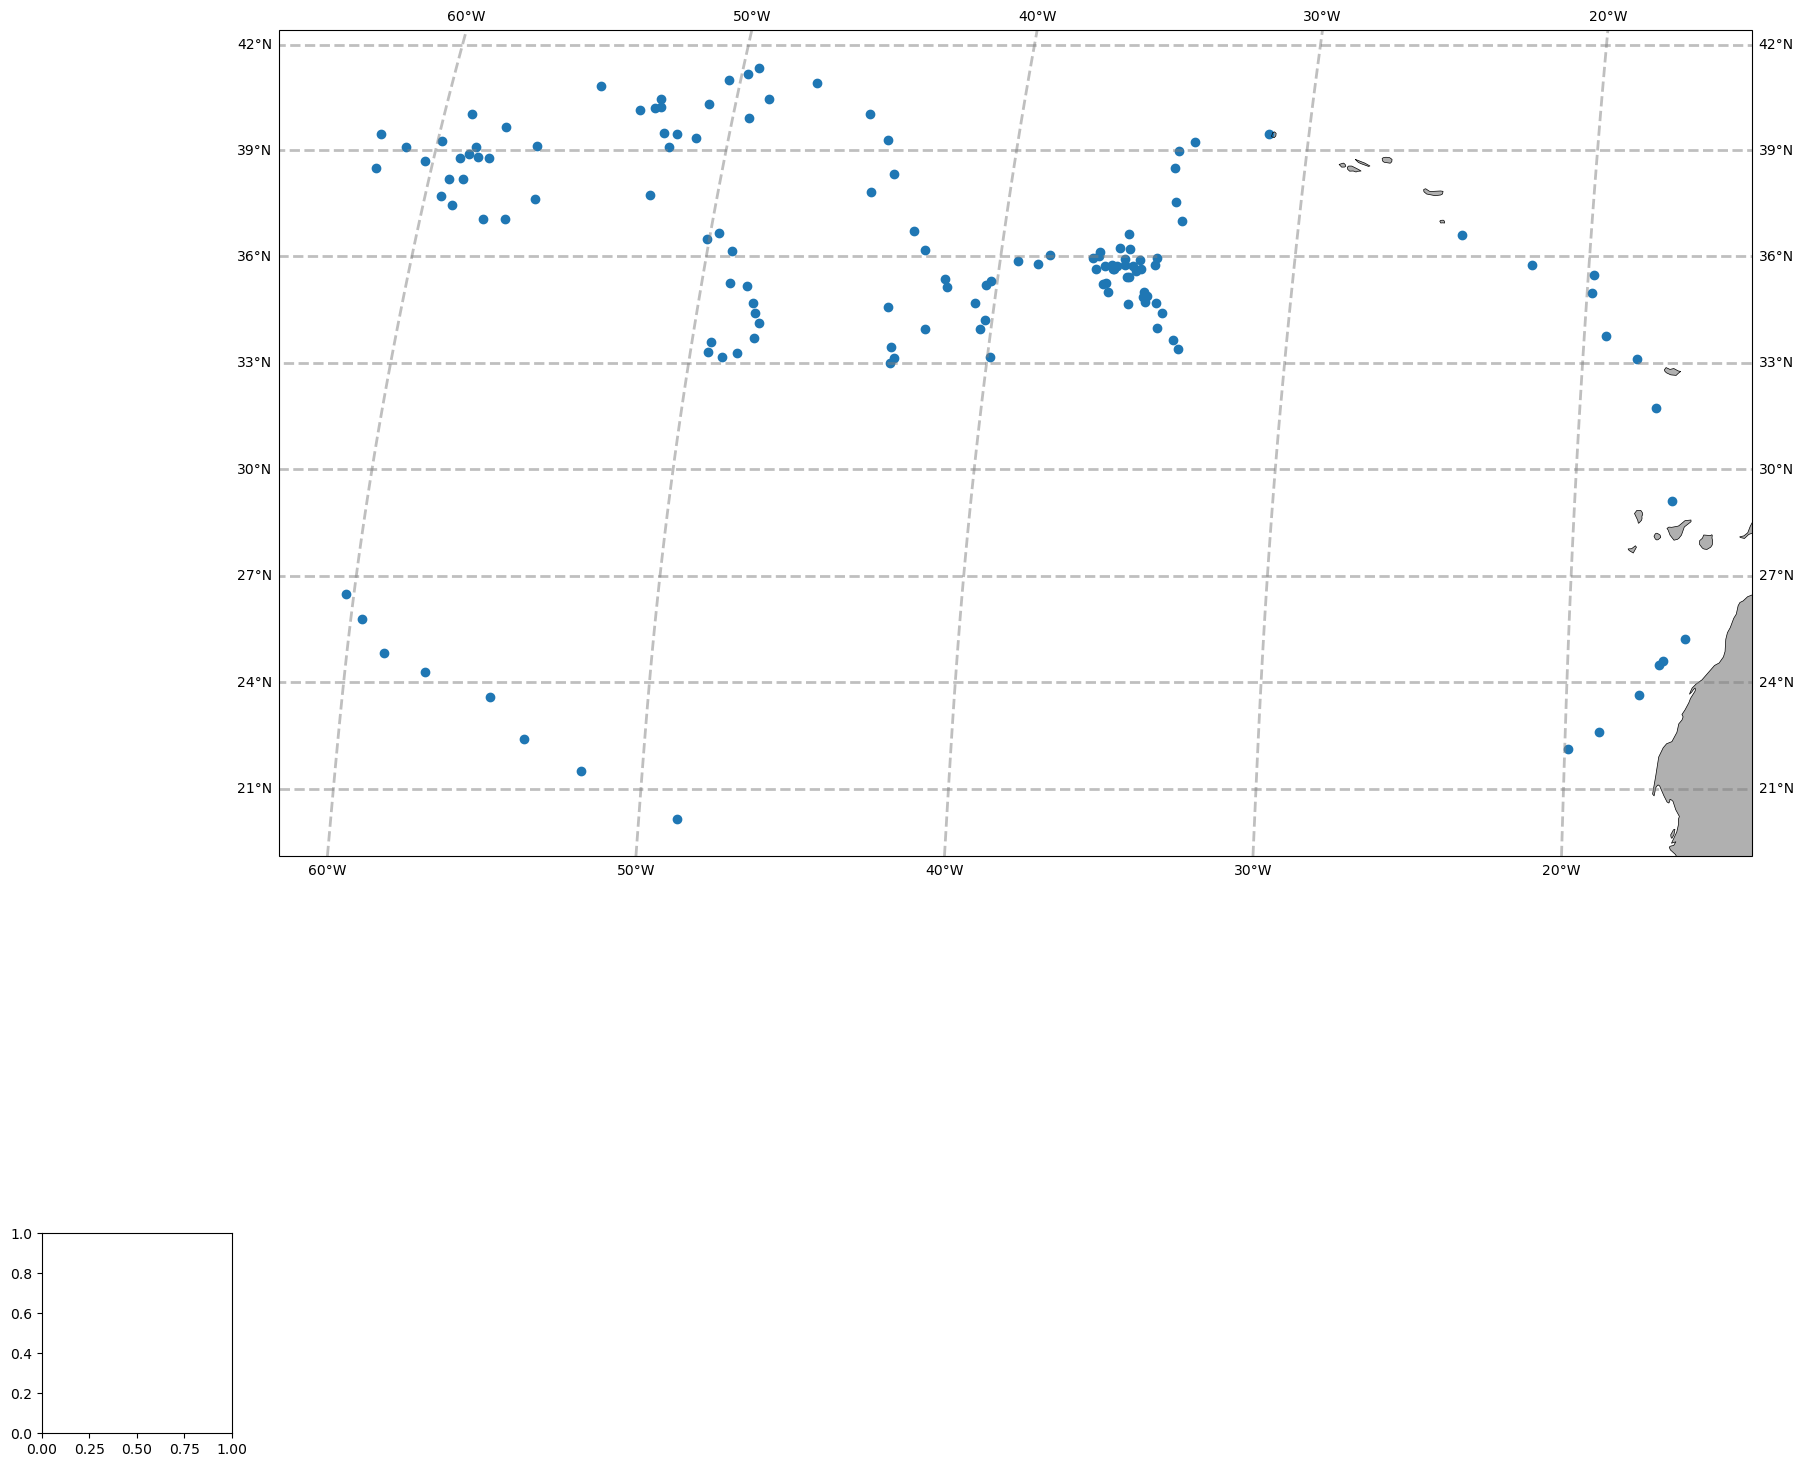

In [16]:
# Plotting 1875 data in the NA
year = 1875
work = df_NA[df_NA['Entry Date Time'].dt.year == year]
lon = work.Longitude
lat = work.Latitude
ws = work['Wind Force']

fig, ax = plt.subplots(figsize=(19,20),subplot_kw={'projection':ccrs.Robinson()})
#_ = ax.set_global()
#_ = ax.set_extent([-80, 0, 5, 60])
_ = ax.coastlines(linewidth=0.5)
_ = ax.add_feature(cfeature.LAND, facecolor='#b0b0b0')
#_ = ax.title('Logbook entries in the North Atlantic in 1875',fontsize=18)
cbar_ax = fig.add_axes([0, 0, 0.1, 0.1])

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

_ = ax.scatter(lon, lat, transform=ccrs.PlateCarree())
#_ = ax.colorbar()


#_ = ax.legend(loc=(1.1,-0.175))

#fig.savefig(os.path.join(Data, 'Tier1_NA_1875_Mar13.png'),dpi=200,bbox_inches='tight')

Number of NA entries in 1875:  (135, 27)



Text(0.5, 1.0, 'Number of Entries per Month in 1875')

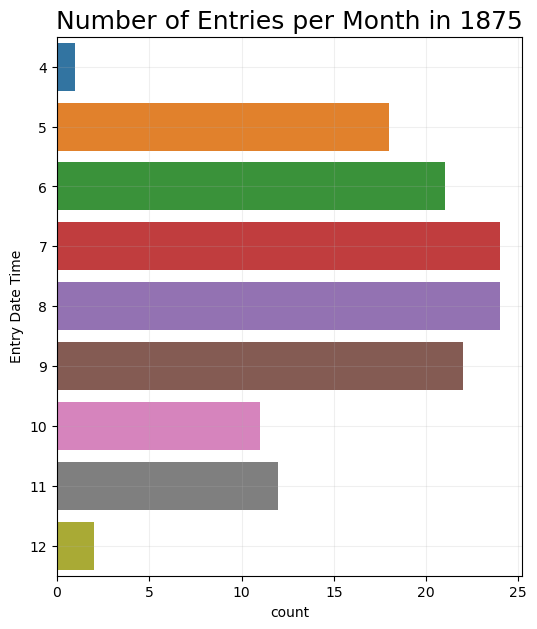

In [17]:
# Number of Entries per month in 1875
print('Number of NA entries in 1875: ',np.shape(df_NA[df_NA['Entry Date Time'].dt.year == 1875]))
#print(df_NA[df_NA["Entry Date Time"]==1875,'LogBook ID'].str.unique())
print()

df_NA_1875 = df_NA[df_NA['Entry Date Time'].dt.year == 1875]

f,ax = plt.subplots(figsize=(6,7))
sns.countplot(y=df_NA_1875["Entry Date Time"].dt.month)
ax.grid(alpha=0.2)
plt.title('Number of Entries per Month in 1875',fontsize=18)

Number of NA entries in 1874:  (12, 27)



Text(0.5, 1.0, 'Number of Entries per Month in 1874')

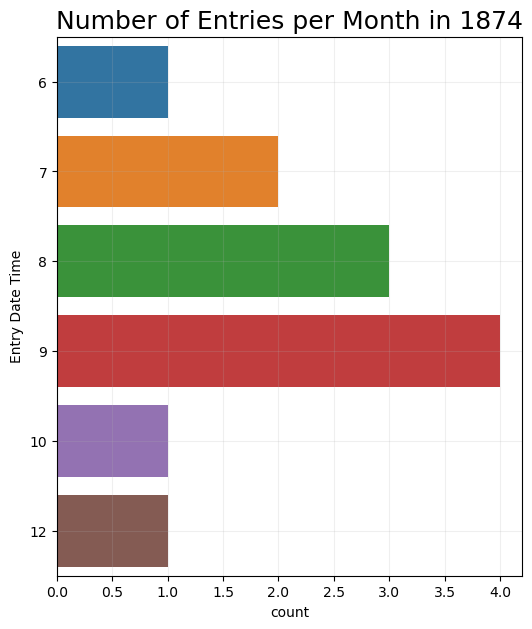

In [18]:
# Number of Entries per month in 1874
print('Number of NA entries in 1874: ',np.shape(df_NA[df_NA['Entry Date Time'].dt.year == 1874]))
#print(df_NA[df_NA["Entry Date Time"]==1874,'LogBook ID'].str.unique())
print()

df_NA_1874 = df_NA[df_NA['Entry Date Time'].dt.year == 1874]

f,ax = plt.subplots(figsize=(6,7))
sns.countplot(y=df_NA_1874["Entry Date Time"].dt.month)
ax.grid(alpha=0.2)
plt.title('Number of Entries per Month in 1874',fontsize=18)

### Average Daily Wind Speed

In [19]:
# Defining Range of Dates over which to iterate
from datetime import date, timedelta

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = np.min(df['Entry Date Time'])
end_date = np.max(df['Entry Date Time'])
end_date += datetime.timedelta(days=1)
dates = []
for single_date in daterange(start_date, end_date):
    dates.append(single_date)
print(np.size(dates))

44321


In [20]:
# Estimating Duplicate Data Entries per day (whole dataset)
counter = 0
for i in dates:
    cumsum=[]
    if np.size(df.loc[df["Entry Date Time"]==i,'Wind Force'])>1:
        cumsum = np.size(df.loc[df["Entry Date Time"]==i,'Wind Force'])
        counter += 1

#print(np.size(daily_ws))
print(counter,' out of ',np.size(df["Wind Force"]),' overall entries have multiple entries on the same day')

14786  out of  96381  overall entries have multiple entries on the same day


In [21]:
# Estimating Duplicate Data Entries per day (NA dataset)
counter = 0
for i in dates:
    cumsum=[]
    if np.size(df_NA.loc[df_NA["Entry Date Time"]==i,'Wind Force'])>1:
        cumsum = np.size(df_NA.loc[df_NA["Entry Date Time"]==i,'Wind Force'])
        counter += 1

#print(np.size(daily_ws))
print(counter,' out of ',np.size(df_NA["Wind Force"]),' NA entries have multiple entries on the same day')

2582  out of  12232  NA entries have multiple entries on the same day


### How many NA Entries are 'usable', i.e. exhibit Lat./Lon. and Wind Speed values?

In [22]:
df_NA['usable'] = (df_NA["Latitude"].notna() & df_NA["Longitude"].notna() & df_NA["Wind Force"].notna())
df_NA.loc[df_NA['usable']==True]

/tmp/ipykernel_764289/3110634449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NA['usable'] = (df_NA["Latitude"].notna() & df_NA["Longitude"].notna() & df_NA["Wind Force"].notna())


,DateTime,ID,LogBook ID,Page,Latitude,Longitude,Depth,Depth Unit,Bottom,Landmark,Ship Heading/Course,Wind Direction,Wind Speed/Force,Wind Force,Sea State,Cloud Cover,Weather,Ship Sightings,Miscellaneous Observations,wind force,Entry Date Time,Direction,Wind Direction Before,coord_diff,usable,usable_latlon,usable_lat
53,1837-01-10 12:00:00,101320.0,Young Phenix (ship) 1836-1840,NaN,8.733333,-21.933333,NaN,fathoms,NaN,NaN,S,NaN,fine trade,5.0,NaN,passing clouds,NaN,NaN,NaN,False,1837-01-10 12:00:00,nan,NaN,False,True,True,True
54,1837-01-09 12:00:00,101319.0,Young Phenix (ship) 1836-1840,NaN,11.650000,-22.733333,NaN,fathoms,NaN,NaN,S,NaN,strong trade,6.0,NaN,passing clouds,NaN,NaN,NaN,False,1837-01-09 12:00:00,nan,NaN,False,True,True,True
55,1837-01-08 12:00:00,101318.0,Young Phenix (ship) 1836-1840,NaN,14.433333,-23.900000,NaN,fathoms,NaN,NaN,SW by S,NaN,strong trade,6.0,NaN,clear,NaN,NaN,NaN,False,1837-01-08 12:00:00,nan,NaN,False,True,True,True
56,1837-01-07 12:00:00,101317.0,Young Phenix (ship) 1836-1840,NaN,16.466667,-23.050000,NaN,fathoms,NaN,NaN,S by E,45.0,strong trades,6.0,NaN,NaN,NaN,NaN,NaN,False,1837-01-07 12:00:00,nan,NE,False,True,True,True
57,1837-01-06 12:00:00,101316.0,Young Phenix (ship) 1836-1840,NaN,18.266667,-23.616667,NaN,fathoms,NaN,NaN,S,22.5,small breezes,2.0,NaN,NaN,fine,NaN,NaN,False,1837-01-06 12:00:00,nan,NNE,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98135,1855-07-20 12:00:00,561.0,Alpha (ship) 1855-1859,6.0,39.816667,-54.116667,NaN,NaN,NaN,NaN,E SE,270.0,strong breezes,6.0,NaN,NaN,squally,NaN,NaN,False,1855-07-20 12:00:00,nan,W,False,True,True,True
98136,1855-07-19 12:00:00,560.0,Alpha (ship) 1855-1859,6.0,40.116667,-59.100000,NaN,NaN,NaN,NaN,E by S,247.5,fine breezes,5.0,NaN,NaN,NaN,NaN,NaN,False,1855-07-19 12:00:00,nan,W SW,False,True,True,True
98138,1855-07-17 12:00:00,558.0,Alpha (ship) 1855-1859,6.0,39.383333,-66.716667,NaN,NaN,NaN,NaN,E NE by the wind,135.0,light breezes,2.0,NaN,NaN,NaN,NaN,NaN,False,1855-07-17 12:00:00,nan,SE,False,True,True,True
98139,1855-07-16 12:00:00,557.0,Alpha (ship) 1855-1859,6.0,38.950000,-60.450000,NaN,Fathoms,NaN,NaN,S by the wind,112.5,light breezes,2.0,NaN,NaN,NaN,NaN,NaN,False,1855-07-16 12:00:00,nan,E SE,False,True,True,True
